In [8]:
from tqdm import tqdm
from game import Game
from agent import RandomAgent, AlphaBetaAgent, SARSA_FeatureAgent, RandomAlphaBeta
from sarsalambda import SarsaLambda
import matplotlib.pyplot as plt
import numpy as np
import sys
#args = sys.argv
NUM_ROWS, NUM_COLS, NUM_EPISODES = 6, 7, 3000
smooth_performance = []


In [ ]:
game = Game(NUM_ROWS, NUM_COLS)

alpha = AlphaBetaAgent(2, 2)
rando = RandomAgent(2)
sarsa_agent = SARSA_FeatureAgent(1, NUM_COLS)

weights, policy_performance = SarsaLambda(
    game, # connect-4 game
    0.9, # discount factor
    0.5, # decay rate
    0.01, # step size
    sarsa_agent,
    alpha, #opponent
    NUM_EPISODES, # episode
)

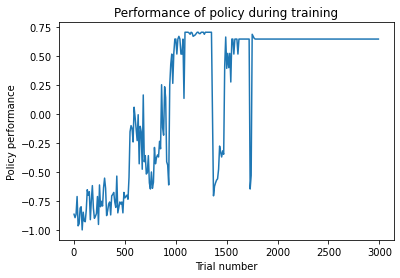

In [6]:
smooth_performance = []
for i in range(len(policy_performance) // 10):
    smooth_performance.append(np.mean(policy_performance[i*10: i*10+10]))
# smooth_rewards = []
# for i in range(len(rewards) // 10):
#     smooth_rewards.append(np.mean(rewards[i*10: i*10+10]))

plt.figure()
plt.plot(range(1, NUM_EPISODES + 1, 10), smooth_performance)
plt.title("Performance of policy during training")
plt.xlabel("Trial number")
plt.ylabel("Policy performance")
plt.savefig('performance_graph.png')
# plt.figure()
# plt.plot(range(1, NUM_EPISODES // 10 + 1), smooth_rewards)
# plt.title("Rewards")
# plt.xlabel("Trial number")
# plt.ylabel("Policy performance")
# plt.savefig('reward_graph.png')

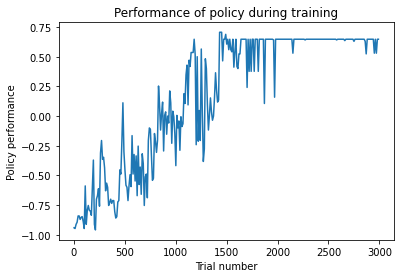

In [5]:
plt.figure()
plt.plot(range(1, NUM_EPISODES + 1, 10), smooth_performance)
plt.title("Performance of policy during training")
plt.xlabel("Trial number")
plt.ylabel("Policy performance")
plt.savefig('performance_graph.png')

In [18]:
wins_alpha = 0
ties_alpha = 0
p1 = AlphaBetaAgent(1, 2)
p2 = RandomAlphaBeta(2, 1)
for _ in tqdm(range(100)):
    game = Game(NUM_ROWS, NUM_COLS)
    while True:
        #p1 turn
        p1_move = p1.get_action(game)
        if p1_move == None or p1_move < 0 or p1_move >= NUM_COLS:
            game.print_board()
            print(p1_move)
        game.drop_piece(p1_move, 1)

        # game.draw_board(screen, SQUARESIZE)
        if game.winning_move_faster(1):
            wins_alpha += 1
            break
        if len(game.get_valid_moves()) == 0:
            print("DRAW")
            ties_alpha += 1
            break
        #p2 turn
        p2_move = p2.get_action(game)
        game.drop_piece(p2_move, 2)
        # game.draw_board(screen, SQUARESIZE)
        if game.winning_move_faster(2):
            break
        if len(game.get_valid_moves()) == 0:
            print("DRAW")
            ties_alpha += 1
            break
print(wins_alpha, ties_alpha)

  6%|▌         | 6/100 [00:18<04:44,  3.03s/it]

DRAW


  8%|▊         | 8/100 [00:24<04:26,  2.89s/it]

DRAW


  9%|▉         | 9/100 [00:26<04:23,  2.89s/it]

DRAW


 10%|█         | 10/100 [00:30<04:37,  3.08s/it]

DRAW


 18%|█▊        | 18/100 [00:54<04:00,  2.94s/it]

DRAW


 23%|██▎       | 23/100 [01:07<03:28,  2.70s/it]

DRAW


 26%|██▌       | 26/100 [01:15<03:27,  2.80s/it]

DRAW


 27%|██▋       | 27/100 [01:19<03:32,  2.91s/it]

DRAW


 31%|███       | 31/100 [01:36<04:34,  3.97s/it]

DRAW


 32%|███▏      | 32/100 [01:40<04:39,  4.11s/it]

DRAW


 38%|███▊      | 38/100 [01:59<03:24,  3.29s/it]

DRAW


 39%|███▉      | 39/100 [02:02<03:21,  3.30s/it]

DRAW


 47%|████▋     | 47/100 [02:30<03:00,  3.41s/it]

DRAW


 49%|████▉     | 49/100 [02:37<02:51,  3.37s/it]

DRAW


 52%|█████▏    | 52/100 [02:47<02:37,  3.28s/it]

DRAW


 66%|██████▌   | 66/100 [03:28<01:43,  3.06s/it]

DRAW


 68%|██████▊   | 68/100 [03:33<01:36,  3.01s/it]

DRAW


 71%|███████   | 71/100 [03:42<01:21,  2.82s/it]

DRAW


 76%|███████▌  | 76/100 [03:55<01:06,  2.77s/it]

DRAW


 78%|███████▊  | 78/100 [04:01<01:05,  2.97s/it]

DRAW


 82%|████████▏ | 82/100 [04:15<00:59,  3.30s/it]

DRAW


 83%|████████▎ | 83/100 [04:18<00:53,  3.18s/it]

DRAW


 92%|█████████▏| 92/100 [04:48<00:25,  3.14s/it]

DRAW


 98%|█████████▊| 98/100 [05:08<00:06,  3.49s/it]

DRAW


100%|██████████| 100/100 [05:13<00:00,  3.14s/it]

DRAW
67 25


In [19]:
wins_sarsa = 0
ties_sarsa = 0
p2 = AlphaBetaAgent(2, 2)

for _ in tqdm(range(100)):
    game = Game(NUM_ROWS, NUM_COLS)
    while True:
        #p1 turn
        p1_move = sarsa_agent.get_action(game)
        game.drop_piece(p1_move, 1)
        # game.draw_board(screen, SQUARESIZE)
        if game.winning_move_faster(1):
            wins_sarsa += 1
            break
        if len(game.get_valid_moves()) == 0:
            print("DRAW")
            ties_sarsa += 1
            break
        #p2 turn
        p2_move = p2.get_action(game)
        game.drop_piece(p2_move, 2)
        # game.draw_board(screen, SQUARESIZE)
        if game.winning_move_faster(2):
            break
        if len(game.get_valid_moves()) == 0:
            print("DRAW")
            ties_sarsa += 1
            break
print(wins_sarsa, ties_sarsa)

100%|██████████| 100/100 [04:56<00:00,  2.96s/it]

100 0
